In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [11]:
df = pd.read_parquet("muestreos_parcelas.parquet")

In [12]:
estados = [
    "estado_fenologico_1",
    "estado_fenologico_2",
    "estado_fenologico_3",
    "estado_fenologico_4",
    "estado_fenologico_5",
    "estado_fenologico_6",
    "estado_fenologico_7",
    "estado_fenologico_8",
    "estado_fenologico_9",
    "estado_fenologico_10",
    "estado_fenologico_11",
    "estado_fenologico_12",
    "estado_fenologico_13",
    "estado_fenologico_14",
]


#Removing null values
df = df.dropna(subset=estados,how="all")
df = df.dropna(subset=['codparcela'])

#Sorting and removing null by date
df['fecha'] = pd.to_datetime(df['fecha'])
df.sort_values(by='fecha',inplace=True)

df

,generated_muestreos,codparcela,provincia,municipio,fecha,campaña,poligono,parcela,recinto,subrecinto,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,porcentaje_floracion,generated_parcelas,102_coordenada_x_(utm),103_coordenada_y_(utm),104_altitud_(m),105_comarca,201_superf_cultivada_en_la_parcela_agrícola_(ha),202_pendiente_(%),203_orientación,204_textura_del_suelo,206_secano_/_regadío,211_utilización_de_cubierta_vegetal,212_tipo_de_cubierta_vegetal,214_cultivo_asociado/otro_aprovechamiento,301_marco_(m_x_m),302_densidad_(plantas/ha),303_nº_pies_por_árbol,304_formación,305_diámetro_de_copa_(m),308_variedad_principal,311_fecha_de_plantación_variedad_principal,208_riego:_procedencia_del_agua,209_riego:_calidad_del_agua,313_variedad_secundaria,107_zona_homogénea,120_zona_biológica_raif,401_estación_climática_asociada,402_sensor_climático_asociado,207_riego:_sistema_usual_de_riego,108_u_h_c_a_la_que_pertenece,316_fecha_de_plantación_variedad_secundaria,315_patrón_variedad_secundaria,317_%_superficie_ocupada_variedad_secundaria,306_altura_de_copa_(m),310_patrón_variedad_principal,411_representa_a_la_u_h_c_(si/no),109_sistema_para_el_cumplimiento_gestión_integrada
374542,2020-04-23 17:00:15,001-00162-00-00,malaga,antequera,2005-08-30,2005,1,162,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,369846.0,4110714.0,680.0,NORTE O ANTEQUERA,23.870001,6.0,NO,FRANCO-ARCILLOSO,SECANO,SI,SILVESTRE FORMADA CON HERBICIDA,NO,13 X 13,59.0,3.0,TRADICIONAL,7.0,HOJIBLANCO,10/10/1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388249,2020-04-23 17:00:15,001-00163-00-00,malaga,archidona,2005-08-30,2005,1,163,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,369846.0,4110714.0,680.0,NORTE O ANTEQUERA,23.870001,6.0,NO,FRANCO-ARCILLOSO,SECANO,SI,SILVESTRE FORMADA CON HERBICIDA,NO,13 X 13,59.0,3.0,TRADICIONAL,7.0,HOJIBLANCO,10/10/1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385226,2020-04-23 17:00:15,110-00004-00-00,malaga,antequera,2005-08-31,2005,110,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,352841.0,4102826.0,480.0,NORTE O ANTEQUERA,99.940002,2.0,S,FRANCO-ARCILLO-ARENOSO,SECANO,SI,SILVESTRE FORMADA CON HERBICIDA,NaN,12 X 12,69.0,3.0,TRADICIONAL,8.0,HOJIBLANCO,12/02/1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375863,2020-04-23 17:00:15,011-00001-00-00,malaga,antequera,2005-08-31,2005,11,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,365123.0,4119136.0,530.0,NORTE O ANTEQUERA,14.200000,3.0,N,FRANCO-ARCILLO-ARENOSO,REGADÍO,SI,SILVESTRE FORMADA CON HERBICIDA,NaN,12 X 12,69.0,3.0,TRADICIONAL,8.0,HOJIBLANCO,21/10/1903,POZO,APTAS PARA EL RIEGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386907,2020-04-23 17:00:15,166-00500-00-00,malaga,antequera,2005-08-31,2005,166,500,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,357448.0,4095675.0,640.0,NORTE O ANTEQUERA,35.000000,10.0,SO,FRANCO-ARCILLOSO,RIEGO DE APOYO,SI,SILVESTRE FORMADA CON HERBICIDA,NaN,7 X 7,204.0,1.0,GLOBO,2.5,PICUAL / MARTEÑO,05/09/1997,BALSA,APTAS PARA EL RIEGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559088,2021-04-05 17:26:06,002-00001-08-00,sevilla,martin de la jara,2021-11-24,2022,2,1,8,0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
#Adding the number of days till next visit for each row
df['next_date'] = df.groupby('codparcela',observed=True)['fecha'].shift(-1)
df['days_until_next_visit'] = (df['next_date'] - df['fecha']).dt.days


#Removing the parcels with only one entry and the last entry for every parcel (we would need to also add the y value of the next entry)

df = df.dropna(subset=['days_until_next_visit']) # 5150 entries removed
df['days_until_next_visit'] = df['days_until_next_visit'].astype('int32')

/var/folders/dz/f2v0bzjj2451zsrm0t4gx04m0000gn/T/ipykernel_29976/350258089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_until_next_visit'] = df['days_until_next_visit'].astype('int32')


(1.0, 30.0)

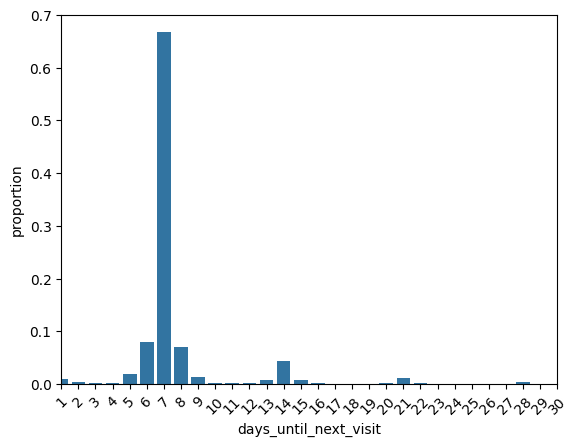

In [14]:
sns.countplot(x='days_until_next_visit', stat='proportion', data=df)
plt.xticks(rotation=45)
plt.xlim(1,30)

In [15]:
print(len(df))
df_reduced = df[df['days_until_next_visit']<30] #18.7k entries removed
print(len(df_reduced))
df_reduced_10_days = df[df['days_until_next_visit']<10]  # 69.3k entries removed
print(len(df_reduced_10_days))

563684
544983
494366


In [16]:
#Value Counts for both cases
df_value_counts = df_reduced['codparcela'].value_counts()
df_value_counts = df_value_counts[df_value_counts > 0]
df_value_counts_10_days = df_reduced_10_days['codparcela'].value_counts()
df_value_counts_10_days = df_value_counts_10_days[df_value_counts_10_days > 0]

In [17]:
df_reduced[df_reduced['codparcela']=="015-00002-00-00"].iloc[:50,]

,generated_muestreos,codparcela,provincia,municipio,fecha,campaña,poligono,parcela,recinto,subrecinto,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,porcentaje_floracion,generated_parcelas,102_coordenada_x_(utm),103_coordenada_y_(utm),104_altitud_(m),105_comarca,201_superf_cultivada_en_la_parcela_agrícola_(ha),202_pendiente_(%),203_orientación,204_textura_del_suelo,206_secano_/_regadío,211_utilización_de_cubierta_vegetal,212_tipo_de_cubierta_vegetal,214_cultivo_asociado/otro_aprovechamiento,301_marco_(m_x_m),302_densidad_(plantas/ha),303_nº_pies_por_árbol,304_formación,305_diámetro_de_copa_(m),308_variedad_principal,311_fecha_de_plantación_variedad_principal,208_riego:_procedencia_del_agua,209_riego:_calidad_del_agua,313_variedad_secundaria,107_zona_homogénea,120_zona_biológica_raif,401_estación_climática_asociada,402_sensor_climático_asociado,207_riego:_sistema_usual_de_riego,108_u_h_c_a_la_que_pertenece,316_fecha_de_plantación_variedad_secundaria,315_patrón_variedad_secundaria,317_%_superficie_ocupada_variedad_secundaria,306_altura_de_copa_(m),310_patrón_variedad_principal,411_representa_a_la_u_h_c_(si/no),109_sistema_para_el_cumplimiento_gestión_integrada,next_date,days_until_next_visit
334742,2020-04-23 16:54:05,015-00002-00-00,jaen,torredonjimeno,2006-03-08,2006,15,2,0,0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,413322.00,4184311.00,500.0,CAMPIÑA DEL SUR,11.36,3.0,NE,FRANCO-ARCILLOSO,SECANO,NO,NaN,NaN,10 X 10,100.0,2.0,NaN,NaN,PICUAL,NaN,NaN,NaN,NaN,13,NaN,JA013,JA013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-15,7
334743,2020-04-23 16:54:05,015-00002-00-00,jaen,torredonjimeno,2006-03-15,2006,15,2,0,0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,413322.00,4184311.00,500.0,CAMPIÑA DEL SUR,11.36,3.0,NE,FRANCO-ARCILLOSO,SECANO,NO,NaN,NaN,10 X 10,100.0,2.0,NaN,NaN,PICUAL,NaN,NaN,NaN,NaN,13,NaN,JA013,JA013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-22,7
91731,2020-04-23 14:34:36,015-00002-00-00,cordoba,palma del rio,2006-03-22,2006,15,2,0,0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,297633.00,4167623.00,NaN,CAMPIÑA BAJA,28.10,1.0,NaN,NaN,REGADÍO,NO,NaN,NaN,7*7,285.0,1.0,NaN,NaN,MANZANILLO,NaN,NaN,NaN,ARBEQUINA,NaN,CO/OL/05 LAS COLONIAS-VEGA BAJA,CO009,NaN,LOCALIZADO GOTERO,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-28,6
334744,2020-04-23 16:54:05,015-00002-00-00,jaen,torredonjimeno,2006-03-28,2006,15,2,0,0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,413322.00,4184311.00,500.0,CAMPIÑA DEL SUR,11.36,3.0,NE,FRANCO-ARCILLOSO,SECANO,NO,NaN,NaN,10 X 10,100.0,2.0,NaN,NaN,PICUAL,NaN,NaN,NaN,NaN,13,NaN,JA013,JA013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-29,1
91732,2020-04-23 14:34:36,015-00002-00-00,cordoba,palma del rio,2006-03-29,2006,15,2,0,0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,297633.00,4167623.00,NaN,CAMPIÑA BAJA,28.10,1.0,NaN,NaN,REGADÍO,NO,NaN,NaN,7*7,285.0,1.0,NaN,NaN,MANZANILLO,NaN,NaN,NaN,ARBEQUINA,NaN,CO/OL/05 LAS COLONIAS-VEGA BAJA,CO009,NaN,LOCALIZADO GOTERO,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-04-04,6
334745,2020-04-23 16:54:05,015-00002-00-00,jaen,torredonjimeno,2006-04-04,2006,15,2,0,0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,413322.00,4184311.00,500.0,CAMPIÑA DEL SUR,11.36,3.0,NE,FRANCO-ARCILLOSO,SECANO,NO,NaN,NaN,10 X 10,100.0,2.0,NaN,NaN,PICUAL,NaN,NaN,NaN,NaN,13,NaN,JA013,JA013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-04-05,1
91733,2020-04-23 14:34:36,015-00002-00-00,cordoba,palma del rio,2006-04-05,2006,15,2,0,0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,297633.00,4167623.00,NaN,CAMPIÑA BAJA,28.10,1.0,NaN,NaN,REGADÍO,NO,N

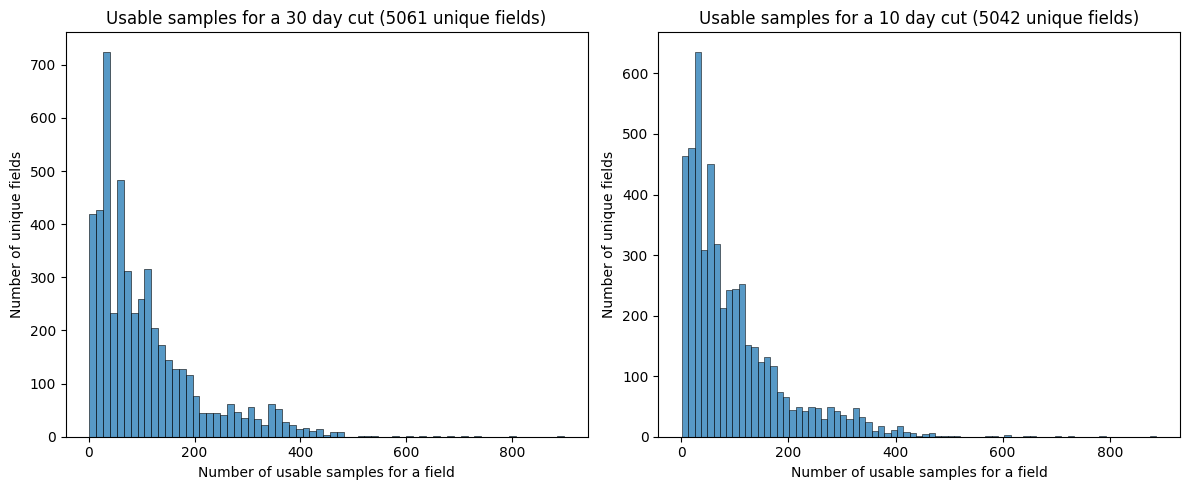

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(data=df_value_counts, ax=axes[0])
axes[0].set_xlabel("Number of usable samples for a field")
axes[0].set_ylabel("Number of unique fields")
axes[0].set_title(f"Usable samples for a 30 day cut ({len(df_value_counts)} unique fields)")

sns.histplot(data=df_value_counts_10_days, ax=axes[1])
axes[1].set_xlabel("Number of usable samples for a field")
axes[1].set_ylabel("Number of unique fields")
axes[1].set_title(f"Usable samples for a 10 day cut ({len(df_value_counts_10_days)} unique fields)")

plt.tight_layout()

plt.show()

### Analizing the cases were the growth stage decreases after increasing.

In [21]:
#Filtering rows that contain more or less than one unique 2.

df.loc[:, "count_2s"] = df[estados].eq(2).sum(axis=1)
df = df[df.count_2s == 1]

,generated_muestreos,codparcela,provincia,municipio,fecha,campaña,poligono,parcela,recinto,subrecinto,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,porcentaje_floracion,generated_parcelas,102_coordenada_x_(utm),103_coordenada_y_(utm),104_altitud_(m),105_comarca,201_superf_cultivada_en_la_parcela_agrícola_(ha),202_pendiente_(%),203_orientación,204_textura_del_suelo,206_secano_/_regadío,211_utilización_de_cubierta_vegetal,212_tipo_de_cubierta_vegetal,214_cultivo_asociado/otro_aprovechamiento,301_marco_(m_x_m),302_densidad_(plantas/ha),303_nº_pies_por_árbol,304_formación,305_diámetro_de_copa_(m),308_variedad_principal,311_fecha_de_plantación_variedad_principal,208_riego:_procedencia_del_agua,209_riego:_calidad_del_agua,313_variedad_secundaria,107_zona_homogénea,120_zona_biológica_raif,401_estación_climática_asociada,402_sensor_climático_asociado,207_riego:_sistema_usual_de_riego,108_u_h_c_a_la_que_pertenece,316_fecha_de_plantación_variedad_secundaria,315_patrón_variedad_secundaria,317_%_superficie_ocupada_variedad_secundaria,306_altura_de_copa_(m),310_patrón_variedad_principal,411_representa_a_la_u_h_c_(si/no),109_sistema_para_el_cumplimiento_gestión_integrada,next_date,days_until_next_visit,count_2s
374542,2020-04-23 17:00:15,001-00162-00-00,malaga,antequera,2005-08-30,2005,1,162,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,369846.0,4110714.0,680.0,NORTE O ANTEQUERA,23.870001,6.0,NO,FRANCO-ARCILLOSO,SECANO,SI,SILVESTRE FORMADA CON HERBICIDA,NO,13 X 13,59.0,3.0,TRADICIONAL,7.0,HOJIBLANCO,10/10/1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-06,7,1
388249,2020-04-23 17:00:15,001-00163-00-00,malaga,archidona,2005-08-30,2005,1,163,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,369846.0,4110714.0,680.0,NORTE O ANTEQUERA,23.870001,6.0,NO,FRANCO-ARCILLOSO,SECANO,SI,SILVESTRE FORMADA CON HERBICIDA,NO,13 X 13,59.0,3.0,TRADICIONAL,7.0,HOJIBLANCO,10/10/1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-06,7,1
385226,2020-04-23 17:00:15,110-00004-00-00,malaga,antequera,2005-08-31,2005,110,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,352841.0,4102826.0,480.0,NORTE O ANTEQUERA,99.940002,2.0,S,FRANCO-ARCILLO-ARENOSO,SECANO,SI,SILVESTRE FORMADA CON HERBICIDA,NaN,12 X 12,69.0,3.0,TRADICIONAL,8.0,HOJIBLANCO,12/02/1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-06,6,1
375863,2020-04-23 17:00:15,011-00001-00-00,malaga,antequera,2005-08-31,2005,11,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,365123.0,4119136.0,530.0,NORTE O ANTEQUERA,14.200000,3.0,N,FRANCO-ARCILLO-ARENOSO,REGADÍO,SI,SILVESTRE FORMADA CON HERBICIDA,NaN,12 X 12,69.0,3.0,TRADICIONAL,8.0,HOJIBLANCO,21/10/1903,POZO,APTAS PARA EL RIEGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-06,6,1
386907,2020-04-23 17:00:15,166-00500-00-00,malaga,antequera,2005-08-31,2005,166,500,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2020-04-23 14:19:57,357448.0,4095675.0,640.0,NORTE O ANTEQUERA,35.000000,10.0,SO,FRANCO-ARCILLOSO,RIEGO DE APOYO,SI,SILVESTRE FORMADA CON HERBICIDA,NaN,7 X 7,204.0,1.0,GLOBO,2.5,PICUAL / MARTEÑO,05/09/1997,BALSA,APTAS PARA EL RIEGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-05,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578116,2021-04-05 17:26:06,009-00042-01-00,sevilla,rubio el,2021-03-24,2021,9,42,1,0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN

In [ ]:
def find_column_with_value_two(row):
    for column in row.index:
        if row[column] == 2:
            number_growth_stage 
            return column.split()

df['estado_principal'] = df[estados].apply(find_column_with_value_two, axis=1)